# Inital Model Builds and Results

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import sys
import os.path
import matplotlib.pyplot as plt

# Scikit Learn 
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier # For feature Selection
from sklearn.ensemble import RandomForestClassifier # For feature Selection
from sklearn.ensemble import AdaBoostClassifier
from sklearn.mixture import GMM # GuassianMixture
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn import metrics

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

%matplotlib inline

/Users/mauracullen/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/mauracullen/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


# Import and Prep Data 

In [3]:
# Import Data 
file_path = os.getcwd() + "/data"
trian_df = pd.read_csv(file_path + '/train.csv')
# test_df = pd.read_csv(file_path + '/test.csv') # final test set

# Target Column
train_labels = trian_df['Cover_Type']
trian_df = trian_df.drop('Cover_Type', 1)

In [4]:
# Define variable types
continuous = [
            'Elevation', 'Aspect', 'Slope',
            'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
            'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
            'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points'
            ]

# remove "Soil_Type7","Soil_Type15" because their data was only one value (data cannot be seperable and irrelevantc)
binary = [
        'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
        'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
        'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7',
        'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11',
        'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15',
        'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19',
        'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23',
        'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27',
        'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31',
        'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35',
        'Soil_Type36', 'Soil_Type37', 'Soil_Type38', 'Soil_Type39',
        'Soil_Type40'
        ]

predictors = continuous + binary

# objective variable is a category
target = 'Cover_Type'


In [5]:
print len(continuous)
print len(binary)
print len(continuous) + len(binary)

10
44
54


In [1]:

# Drop Binary data (?)


NameError: name 'trian_df' is not defined

In [29]:
# Test Train Split 
# l = len(target)
X_train, X_test, y_train, y_test = train_test_split(trian_df, train_labels, test_size=0.30, random_state=42)
print "Train data size %i X %i" % (X_train.shape[0], X_train.shape[1])
print "Test data size %i X %i" % (X_test.shape[0], X_test.shape[1])


Train data size 10584 X 55
Test data size 4536 X 55


## Test Model Types

#### Initial Settings for Models

In [30]:
# Fetaure Selection Settings
# grid_search = False
importance_threshold = 0.01

# Model Settings 
run_adaBoost = True
run_GMM = True
run_PCA = True
score = 'f1_weighted'
cv = 10

# Grid Parameters 



# Target Variable Names 
target_names_list = ["Spruce/Fir", "Lodgepole Pine", "Ponderosa Pine", 
                "Cottonwood/Willow", "Aspen", "Douglas-fir", "Krummholz"]
target_names_dict = {1:"Spruce/Fir",2:"Lodgepole Pine",3:"Ponderosa Pine", 
                4:"Cottonwood/Willow",5:"Aspen", 6:"Douglas-fir", 7:"Krummholz"}


### Feature Selection

In [31]:
# Dtree Fetaure Selection 

In [32]:
# Define function for finding feature importance 
def find_fetaure_importnace(X_train_data, y_train_data, importance_threshold): 
    # Make a grid search? 
    dt = DecisionTreeClassifier()
    len(X_train_data)
    len(y_train_data)
    dt.fit(X_train_data, y_train_data)

    # Report Feature Importnace in DTREE 
    importance_df = pd.DataFrame({
        'feature': X_train_data.columns,
        'importance': dt.feature_importances_
    })
    importance_df.sort_values('importance').plot(x='feature', kind='bar')
    
    print "Select only features >= %0.3f importance as predicted by Dtree" % importance_threshold 
    importance_df_reduced = importance_df[importance_df['importance'] >= importance_threshold]
    importance_df_reduced.sort_values('importance').plot(x='feature', kind='bar')
    
    # Select Columns to keep 
    df = X_train_data[importance_df_reduced.feature.values]
    return importance_df_reduced.feature.values, df


Original Dataset Size 10584 X 55
Select only features >= 0.010 importance as predicted by Dtree
Reduced Dataset Size 10584 X 15

Keeping 15 Columns: 
['Id', 'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Soil_Type3', 'Soil_Type4', 'Soil_Type10']


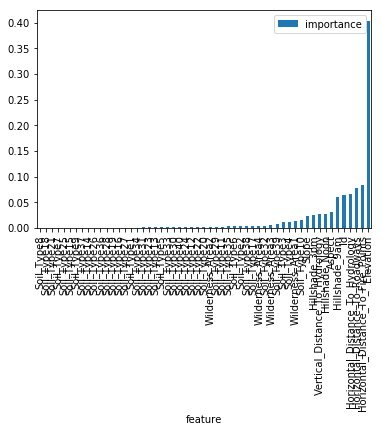

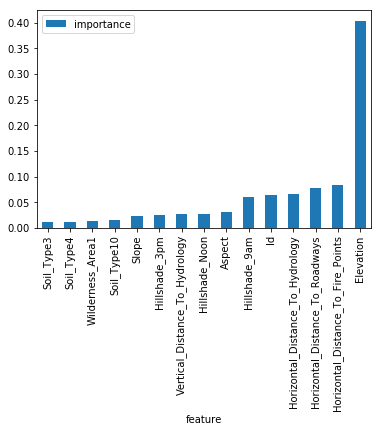

In [33]:
# Feature Selection with all Data 
print "Original Dataset Size %i X %i" %(X_train.shape[0],X_train.shape[1])

# Reduce Dataset
feature_names, X_train_reduced = find_fetaure_importnace(X_train, y_train, importance_threshold)
X_test_reduced =  X_test[feature_names]

print "Reduced Dataset Size %i X %i" %(X_train_reduced.shape[0],
                                       X_train_reduced.shape[1])
print "\nKeeping %i Columns: " % len(feature_names)
print list(feature_names)


Original Dataset Size 10584 X 11
Select only features >= 0.010 importance as predicted by Dtree
Reduced Dataset Size 10584 X 11

Keeping 11 Columns: 
['Id', 'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']


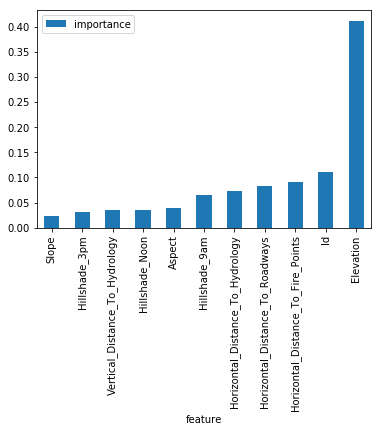

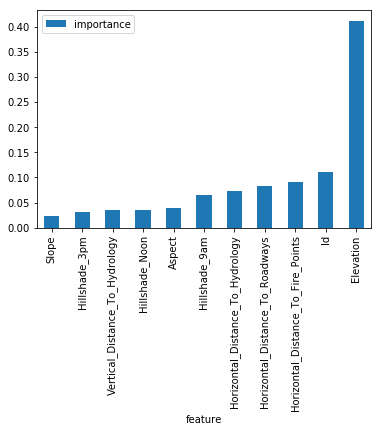

In [34]:
# Feature Selection with no Binary Data 
# Drop Binary Data 
X_train_noBin = X_train.drop(binary, axis=1)
X_test_noBin = X_test.drop(binary, axis = 1)
print "Original Dataset Size %i X %i" %(X_train_noBin.shape[0],X_train_noBin.shape[1])

# Reduce Dataset
feature_names, X_train_noBin_reduced = find_fetaure_importnace(X_train_noBin, y_train, importance_threshold)
X_test_noBin_reduced =  X_test[feature_names]
print "Reduced Dataset Size %i X %i" %(X_train_noBin.shape[0],X_train_noBin.shape[1])
print "\nKeeping %i Columns: " % len(feature_names)
print list(feature_names)


### Models

In [35]:
# TODO: Remember results for final summary 
# model name, train data, params, rcall, precision, accuracy
results_df = pd.DataFrame(columns = ['model_name', 'train_data', 'Best_Parameters',
                                     'recall', 'precision'])

In [36]:
def fit_model(model_name, search_grid, score, train_df, train_labels, cv):
    param_searcher = GridSearchCV(model_name(), search_grid, cv=cv, scoring=score)
    param_searcher.fit(train_df, train_labels)
    return param_searcher


In [37]:
def plot_grid_scores(x,y,x_label,y_label,title):
    plt.plot(x, y, '.')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()
    return plt

#### ADA Boost 

In [38]:
from sklearn.metrics import recall_score

def run_ada_boost(search_grid, train_data, train_labels, test_data, test_labels): 
    
    ada_gs = fit_model(AdaBoostClassifier, search_grid, score, 
                      train_data, train_labels, cv)
    
    ada_gs.grid_scores_
    grid_scores = pd.DataFrame(ada_gs.grid_scores_)
    params = []
    for i in range(len(grid_scores['parameters'])):
        params.append(grid_scores['parameters'][i]['n_estimators'])
    
    plot_grid_scores(params, grid_scores['mean_validation_score'], "n_estimators", 
                     "Mean Validation Score", "GridSearch ADA Boost")
    
    print "Best Parameters" 
    print ada_gs.best_params_
    # fit ada with best parameters
    ada = AdaBoostClassifier(algorithm=ada_gs.best_params_['algorithm'],
                            n_estimators = ada_gs.best_params_['n_estimators'])
    
    ada.fit(train_data, train_labels)
    # Print Classification Summary Scored in Development 
    print "Accuracy Score on Test Set with Best Params: %0.2f%%" % (ada.score(test_data, y_test))

    preds = ada.predict(test_data)
    print metrics.classification_report(test_labels, preds, target_names = target_names_list)                       
    recall = recall_score(test_labels, preds, average='weighted')
    precision = precision_score(test_labels, preds, average='weighted' )
    return ada, ada_gs, precision, recall 
    

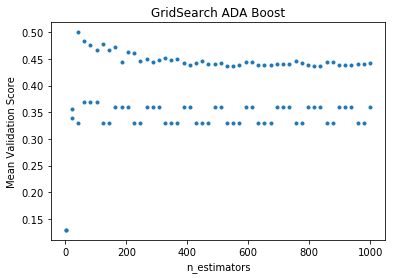

Best Parameters
{'n_estimators': 41, 'algorithm': 'SAMME'}
Accuracy Score on Test Set with Best Params: 0.55%
                   precision    recall  f1-score   support

       Spruce/Fir       0.41      0.65      0.50       620
   Lodgepole Pine       0.58      0.06      0.11       658
   Ponderosa Pine       0.54      0.32      0.40       645
Cottonwood/Willow       0.61      0.83      0.70       661
            Aspen       0.56      0.75      0.64       650
      Douglas-fir       0.47      0.46      0.47       650
        Krummholz       0.71      0.77      0.74       652

      avg / total       0.56      0.55      0.51      4536



In [39]:
# Train with reduced data 
if run_adaBoost == True: 
    search_grid = {'n_estimators': np.linspace(1,1000,50, dtype = int), 'algorithm': ['SAMME', 'SAMME.R']}
    
    ada, ada_gs, precision, recall = run_ada_boost(search_grid, X_train_reduced, y_train, X_test_reduced, y_test)
    
    # Save Results 
    rowi = pd.DataFrame({'model_name': "AdaBoost", 'train_data': "train_reduced", 'Best_Parameters': str(ada_gs.best_params_),
                     'recall': recall, 'precision': precision}, index=[0]) 
    results_df = pd.concat([results_df, rowi], axis = 0)
    

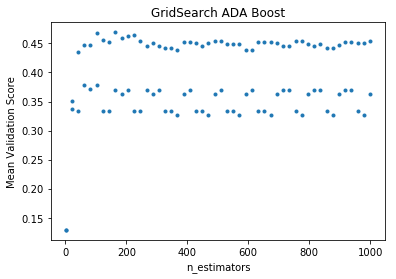

Best Parameters
{'n_estimators': 164, 'algorithm': 'SAMME'}
Accuracy Score on Test Set with Best Params: 0.45%
                   precision    recall  f1-score   support

       Spruce/Fir       0.37      0.55      0.44       620
   Lodgepole Pine       0.37      0.37      0.37       658
   Ponderosa Pine       0.36      0.30      0.33       645
Cottonwood/Willow       0.51      0.21      0.30       661
            Aspen       0.62      0.58      0.60       650
      Douglas-fir       0.41      0.70      0.52       650
        Krummholz       0.67      0.42      0.52       652

      avg / total       0.47      0.45      0.44      4536



In [40]:
# Train witn reduced data and no binary data 
if run_adaBoost == True: 
    search_grid = {'n_estimators': np.linspace(1,1000,50, dtype = int), 'algorithm': ['SAMME', 'SAMME.R']}
    ada, ada_gs, precision, recall = run_ada_boost(search_grid, X_train_noBin_reduced, y_train, 
                                                   X_test_noBin_reduced, y_test)
    
    # Save Results 
    rowi = pd.DataFrame({'model_name': "AdaBoost", 'train_data': "noBin_reduced", 'Best_Parameters': str(ada_gs.best_params_),
                     'recall': recall, 'precision': precision}, index=[0]) 
    results_df = pd.concat([results_df, rowi], axis = 0)

   

#### PCA 

In [41]:
def find_best_components(n_features, X_train_data, train_labels, X_test_data, test_labels):
    pca = PCA(n_components=n_features)
    X_transformed = pca.fit_transform(X_train_data)
    lr = LinearRegression()
    lr.fit(X_transformed, train_labels)
    return lr.score(pca.transform(X_test_data), test_labels)

# out = [best_components(i) for i in range(1, 121)]


In [42]:
def report_explained_variance(train_data): 
    pca = PCA()
    pca.fit(train_data)
    X_train = pca.transform(train_data)
    var_explained = pd.Series(range(51)).apply(lambda k: sum(pca.explained_variance_ratio_[0:k]))
    
    print "Train Data Shape After PCA: %i X %i" % (X_train.shape[0],X_train.shape[1])
    print "\nVariance Explained: "
    print "n_components  |  PC var explained"
    for i in range(5):
        print "%13i |    %1.2f%%" % (i+1, var_explained[i])

    # Calculate Fraction of the total variance explained by the first k principal components, for k in [1, 50]
    print "\nFraction of Total Variance explained by first k componentes where k = [1,50]"
    plt.plot(var_explained)
    plt.xlabel("Number of Principal Components")
    plt.ylabel("Percentage Exaplained")
    plt.title("Percentage of Variance Explained by Principal Components")
    plt.show()
    
    return(var_explained, pca)

In [43]:
# Fetaure Mapping Plot 
def plot_feature_mapping(pca):
    Vt = pca.components_[:pca.components_.shape[0], :]
    comp0 = pd.Series(dict(zip(X_train.columns, Vt[0, :])))
    comp1 = pd.Series(dict(zip(X_train.columns, Vt[1, :])))
    col_order = comp0.sort_values().index
    plt.figure(figsize=(4, 24))
    comp0[col_order].plot(kind='barh')
    comp1[col_order].plot(kind='barh', color='red')

Train Data Shape After PCA: 10584 X 15

Variance Explained: 
n_components  |  PC var explained
            1 |    0.00%
            2 |    0.86%
            3 |    0.96%
            4 |    0.99%
            5 |    1.00%

Fraction of Total Variance explained by first k componentes where k = [1,50]


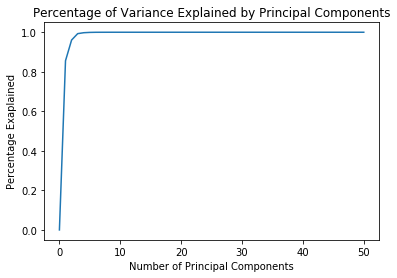

In [44]:
# if run_pca == True: 
# find variance explained for each iteration   
var_explained, pca = report_explained_variance(X_train_reduced)

# Plot for features explaination
# plot_feature_mapping(pca)

# TODO: Plot Training space


In [45]:
# Choose n_components to use for traing 
pca = PCA(n_components=3)
pca.fit(X_train_reduced)
X_train_pca = pca.transform(X_train_reduced)
X_test_pca = pca.transform(X_test_reduced)


In [46]:
# Train models using PCA data from above 
# TODO: Grid Search LR
# Linear Regression
lr = LinearRegression()
lr.fit(X_train_pca, y_train)

print 'Train R-squared: {:.3}'.format(lr.score(X_train_pca, y_train))
print 'Test R-squared: {:.3}'.format(lr.score(X_test_pca, y_test))

# Logistic Regression, Random Forest 


Train R-squared: 0.0236
Test R-squared: 0.0208


In [47]:
# GMM/ PCA

#### Guassian Mixture Model  

In [48]:
def fit_gmm(pca_components, gmm_components, covariance_type, train_data, train_labels, test_data, test_labels):
    # RUN PCA
    pca = PCA(n_components=pca_components)
    pca.fit(train_data)
    train= pca.transform(train_data)
    test = pca.transform(test_data)
    
    # fit  GMM
    gmm = GMM(n_components = gmm_components,  covariance_type = covariance_type)
    gmm.fit(train[np.where(train_labels==1)])
    y_hat_pos = gmm.score(test)
    # Negative Model
    gmm.fit(train[np.where(train_labels==0)])
    y_hat_neg = gmm.score(test)
    
    
    # REPORT ACCURACY 
    preds = np.zeros(len(y_hat_pos))
    preds[np.where(y_hat_pos > y_hat_neg)] = 1
    acc = metrics.accuracy_score(test_labels, preds)
    
    return acc, preds

In [49]:
# TODO: Ask Mike if we have to fit one for all 7 types

In [50]:
# Param search: pca_components, n_components, cavariance types
# Fit model for each of 7 parameters

gmm = GMM()
gmm.fit(X_train_reduced, y_train)
np.unique(gmm.predict(X_test_reduced))

# np.unique(gmm.predict(X_test_reduced))


/Users/mauracullen/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/mauracullen/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/mauracullen/anaconda/lib/python2.7/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/mauracullen/anaconda/lib/python2.7/site-packages/sklea

array([0])

In [51]:
# Look at AIC/BIC
# Should I be used PCA data with this? 
# Recreat P3 density plot with this


### Results 

In [52]:
# Report Results for all Models for Comparison 
# Accuracy, Recall, Precision, Number of Parameters, Features Used in model 
